# Задание 1

Выполнил студент Латонов Валерий

In [132]:
import os
import random
from dataclasses import dataclass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def set_seed(seed: int = 111):
    random.seed(seed)
    np.random.seed(seed)


set_seed(111)

In [133]:
from datasets import load_dataset

ds = load_dataset("polinaeterna/tabular-benchmark", "clf_cat_covertype")

df = ds['train'].to_pandas()

# Формулировка задачи

В рамках данной задачи необзодимо предсказать признак 'class'

In [134]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,3156.0,45.0,15,212.0,39.0,5208.0,223,207,115,2925.0,...,0,0,0,0,0,0,0,0,0,1
1,3164.0,346.0,2,295.0,33.0,3114.0,215,235,158,934.0,...,0,0,0,0,0,0,0,0,0,1
2,2839.0,136.0,13,190.0,28.0,3000.0,240,235,122,2122.0,...,0,0,0,0,0,0,0,0,0,1
3,2924.0,324.0,14,60.0,11.0,4699.0,183,224,180,2279.0,...,0,0,0,0,0,0,0,0,0,1
4,3090.0,45.0,22,430.0,20.0,4108.0,220,188,92,3165.0,...,0,0,0,0,0,0,0,0,0,1


In [135]:
from sklearn.model_selection import train_test_split

n_before = len(df)
n_duplicates = df.duplicated().sum()

print(f"Размер до удаления дубликатов: {df.shape}")
print(f"Число полностью дублирующихся строк: {n_duplicates}")

df = df.drop_duplicates().reset_index(drop=True)

n_after = len(df)
print(f"Размер после удаления дубликатов: {df.shape}")
print(f"Фактически удалено строк: {n_before - n_after}")

target_col = "class"

drop_cols = [target_col, "totalBRL"] if "totalBRL" in df.columns else [target_col]
feature_cols = [c for c in df.columns if c not in drop_cols]

soil_features = list(filter(lambda x: 'Soil_Type' in x, feature_cols))
area_features = list(filter(lambda x: 'Wilderness_Area' in x, feature_cols))
main_features = list(filter(lambda x: x not in soil_features + area_features, feature_cols))


def split_data(features):
    X = df[features]
    y = df[target_col].apply(lambda x: x - 1)

    print("\nЧисло признаков:", X.shape[1])
    print("Список признаков:", features)

    # 20% в тест
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=0.2, random_state=111
    )

    # Из оставшихся 80% -> 60% train, 20% val
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.25, random_state=111
    )  # 0.25 * 0.8 = 0.2

    print("\nTrain:", X_train.shape, y_train.shape)
    print("Val:  ", X_val.shape,   y_val.shape)
    print("Test: ", X_test.shape,  y_test.shape)

    return X_test, y_test, X_train, y_train, X_val, y_val

Размер до удаления дубликатов: (423680, 55)
Число полностью дублирующихся строк: 0
Размер после удаления дубликатов: (423680, 55)
Фактически удалено строк: 0


# EDA 

Посмотрим на данные и их свойства

Выделим три группы признаков: 

soil_features и area_features - категориальные признаки, уже закодированные в датасете, выделим столбцы, которые их кодируют отдельно

main_features - числовые признаки по которым можно делать предсказания

In [136]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,423680.0,3024.767025,201.615937,2142.0,2899.0,3037.0,3179.0,3686.0
Aspect,423680.0,154.075965,112.265872,0.0,56.0,124.0,259.0,360.0
Slope,423680.0,13.332215,6.972801,0.0,8.0,12.0,17.0,66.0
Horizontal_Distance_To_Hydrology,423680.0,275.084248,213.439101,0.0,108.0,228.0,391.0,1390.0
Vertical_Distance_To_Hydrology,423680.0,43.995844,57.038281,-166.0,6.0,27.0,65.0,598.0
Horizontal_Distance_To_Roadways,423680.0,2521.057036,1562.523298,0.0,1260.0,2220.0,3541.0,7117.0
Hillshade_9am,423680.0,212.931014,24.889943,0.0,200.0,218.0,231.0,254.0
Hillshade_Noon,423680.0,224.374799,18.366811,0.0,214.0,227.0,237.0,254.0
Hillshade_3pm,423680.0,143.415351,36.141922,0.0,121.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,423680.0,2087.911811,1334.918363,0.0,1140.0,1834.0,2647.0,7172.0


Будет полезно посмотреть на корреляцию признаков между собой, так как это может выявить линейную взаимосвязь между ними и/или целевой переменной

<Axes: >

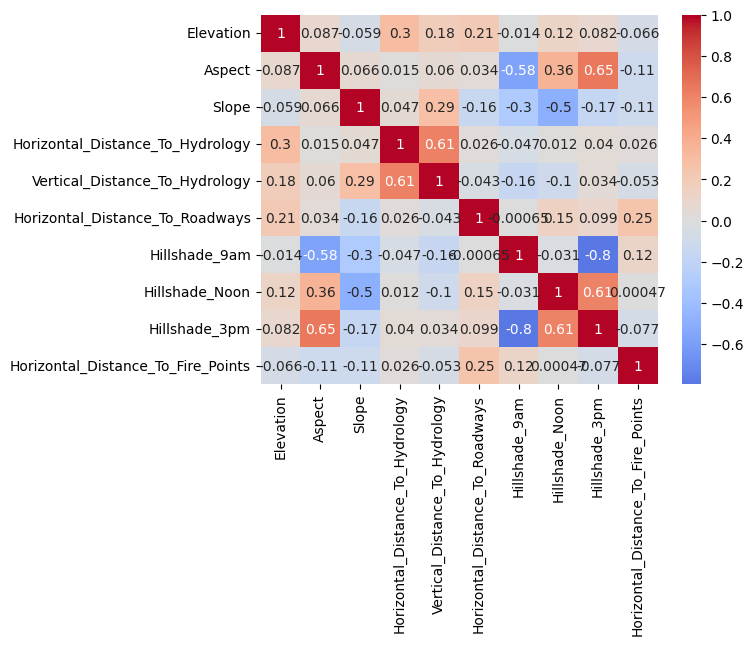

In [137]:
import seaborn as sns

sns.heatmap(df[main_features].corr(), annot=True, cmap='coolwarm', center=0)

In [138]:
def show_corr(correlation, colors='blue'):
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(correlation.keys(), correlation.values(), color=colors)

    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')  
        label.set_va('top')    
        label.set_fontsize(8)
        

    plt.xlabel('Признаки')
    plt.ylabel('Корреляция')
    plt.title('Корреляция признаков с class')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Построим рейтинг наиболее коррелирующих признаков с целевой переменной

c:\Users\Latonov Valery\Desktop\Мага МЛ\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3023: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Latonov Valery\Desktop\Мага МЛ\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3024: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


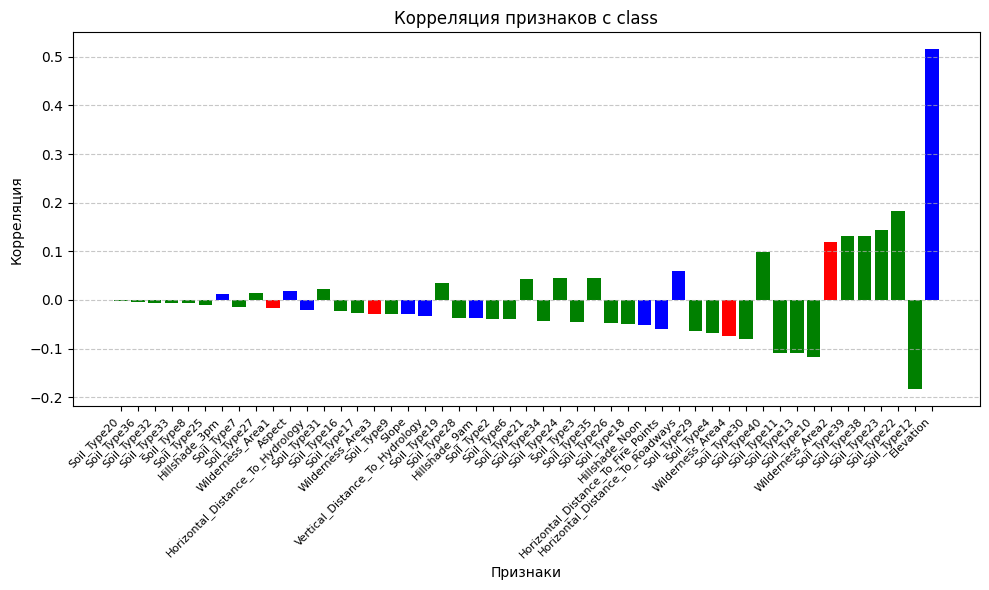

In [139]:
correlation = df[soil_features + area_features + main_features].corrwith(df[['class']].iloc[:, 0]).sort_values(key=abs).dropna().to_dict()

show_corr(correlation, ['red' if i in area_features else 'green' if i in soil_features else 'blue' for i in correlation])

Обратим внимание на Elevation, которая на фоне всех остальных признаков сильно выделяется среди main_features зависимостью с class

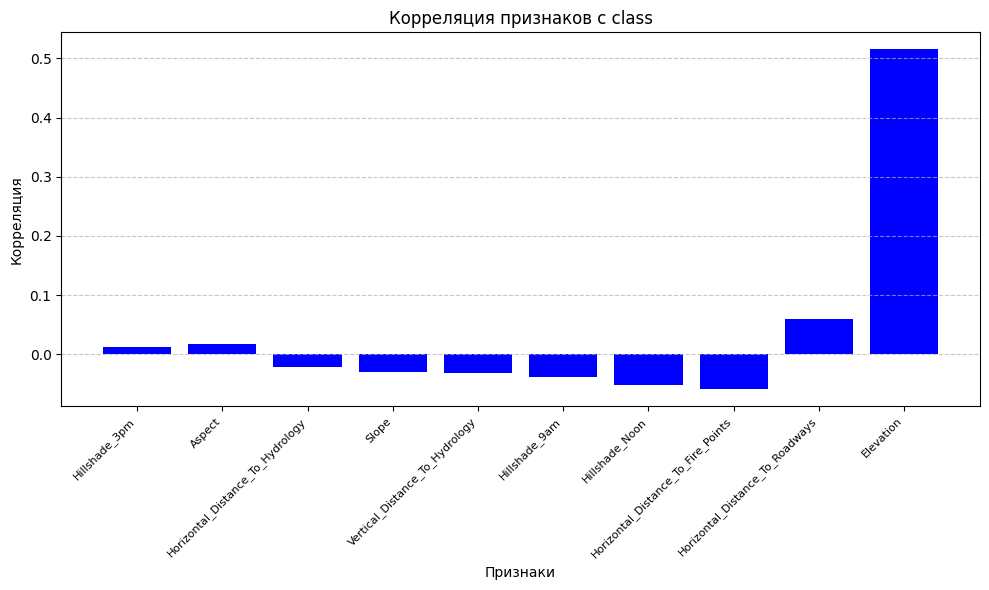

In [140]:
show_corr(df[main_features].corrwith(df[['class']].iloc[:, 0]).sort_values(key=abs).to_dict())


c:\Users\Latonov Valery\Desktop\Мага МЛ\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3023: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Latonov Valery\Desktop\Мага МЛ\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3024: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


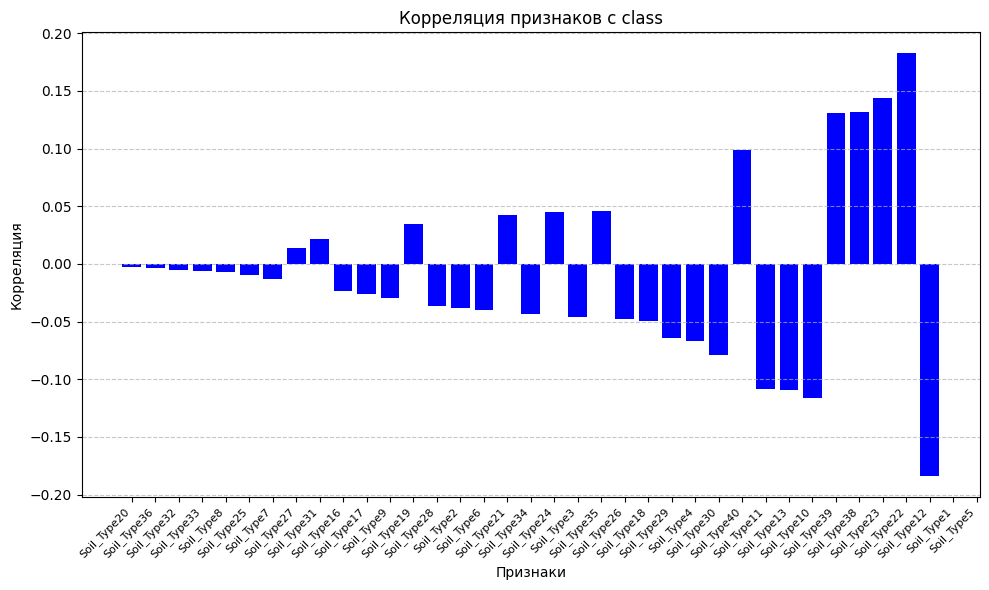

In [141]:
show_corr(df[soil_features].corrwith(df[['class']].iloc[:, 0]).sort_values(key=abs).to_dict())

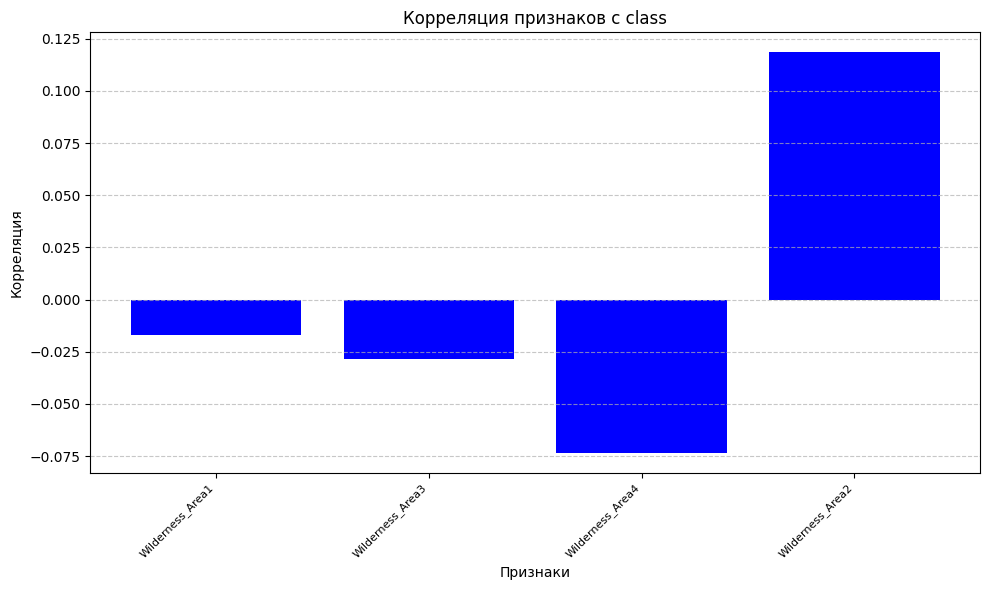

In [142]:
show_corr(df[area_features].corrwith(df[['class']].iloc[:, 0]).sort_values(key=abs).to_dict())

Количество разных классов целевой переменной равномено, что значит что датасет сбалансирован

<Axes: >

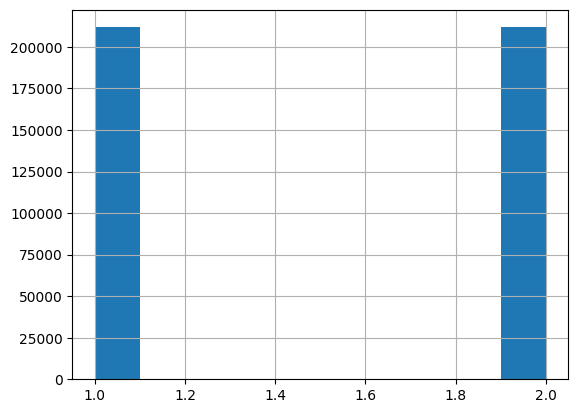

In [143]:
df['class'].hist()

array([[<Axes: title={'center': 'Wilderness_Area1'}>,
        <Axes: title={'center': 'Wilderness_Area2'}>],
       [<Axes: title={'center': 'Wilderness_Area3'}>,
        <Axes: title={'center': 'Wilderness_Area4'}>]], dtype=object)

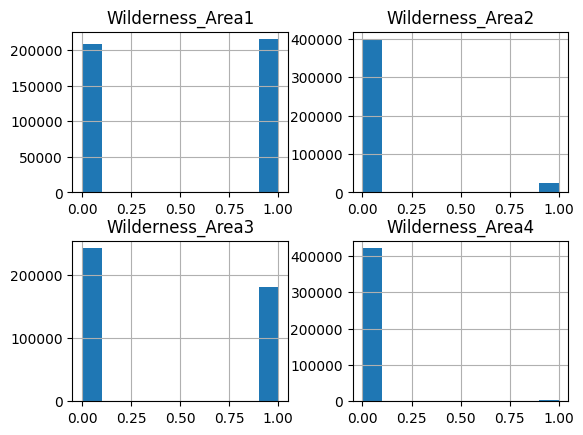

In [144]:
df[area_features].hist()

array([[<Axes: title={'center': 'Elevation'}>,
        <Axes: title={'center': 'Aspect'}>,
        <Axes: title={'center': 'Slope'}>],
       [<Axes: title={'center': 'Horizontal_Distance_To_Hydrology'}>,
        <Axes: title={'center': 'Vertical_Distance_To_Hydrology'}>,
        <Axes: title={'center': 'Horizontal_Distance_To_Roadways'}>],
       [<Axes: title={'center': 'Hillshade_9am'}>,
        <Axes: title={'center': 'Hillshade_Noon'}>,
        <Axes: title={'center': 'Hillshade_3pm'}>],
       [<Axes: title={'center': 'Horizontal_Distance_To_Fire_Points'}>,
        <Axes: >, <Axes: >]], dtype=object)

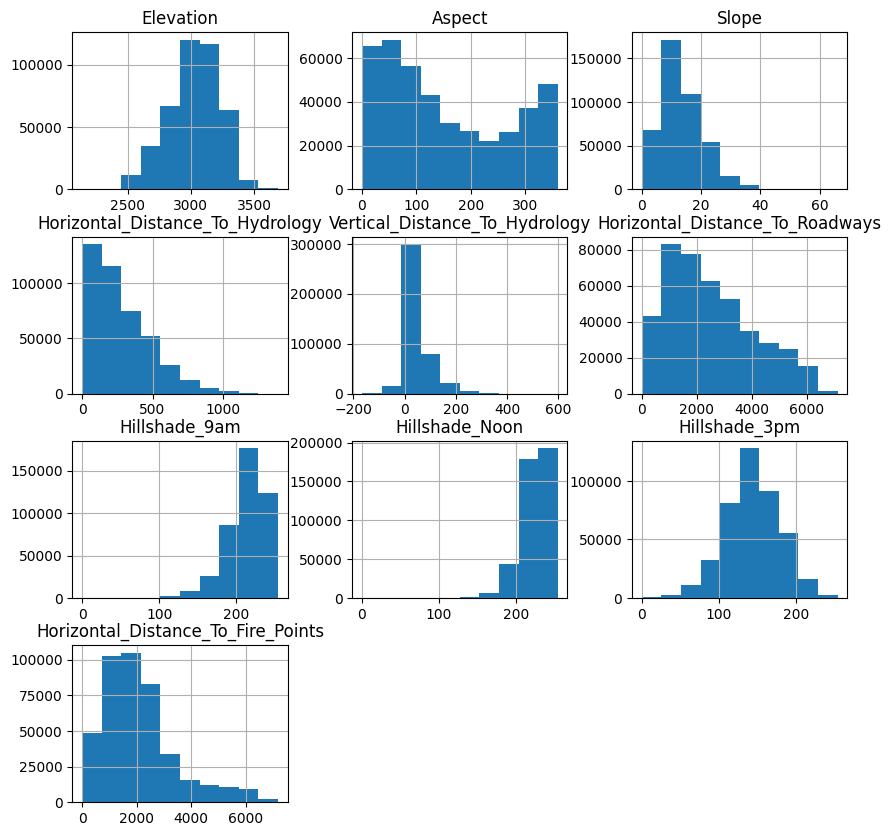

In [145]:
df[main_features].hist(figsize=(10, 10))

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, confusion_matrix, classification_report


results = {}

def log_results(model_name: str, split: str, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true > 0.5, y_pred)

    f1 = f1_score(y_true, y_pred > 0.5)

    if model_name not in results:
        results[model_name] = {}

    results[model_name][split] = {
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "r2": r2,
        "f1": f1,
    }

def print_metrics(split_name: str, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true > 0.5, y_pred)
    f1 = f1_score(y_true, y_pred > 0.5)

    print(f"=== {split_name} ===")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"R2  : {r2:.4f}")
    print(f"F1  : {f1:.4f}")
    print()

# Обучение линейной регрессии

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

set_seed(111)

linreg_name = "Linear Regression"

linreg_pipeline = Pipeline([
    ("scaler", StandardScaler()), # Добавим масштабирование признков
    ("model", LinearRegression())
])

Результаты на всех признаках

Число признаков: 54
Список признаков: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

Train: (254208, 54) (254208,)
Va

<Axes: >

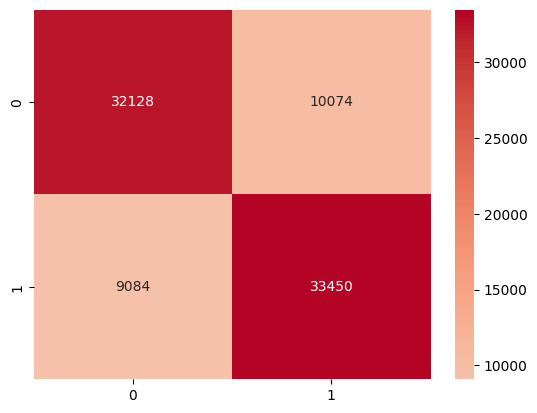

In [148]:
print("Результаты на всех признаках")

X_test, y_test, X_train, y_train, X_val, y_val = split_data(feature_cols)

# обучение на train
linreg_pipeline.fit(X_train, y_train)

# предсказания
y_train_pred = linreg_pipeline.predict(X_train)
y_val_pred   = linreg_pipeline.predict(X_val)
y_test_pred  = linreg_pipeline.predict(X_test)

# логируем результаты
log_results(linreg_name, "train", y_train, y_train_pred)
log_results(linreg_name, "val",   y_val,   y_val_pred)
log_results(linreg_name, "test",  y_test,  y_test_pred)

print("Модель:", linreg_name)
print_metrics("Train", y_train, y_train_pred)
print_metrics("Val",   y_val,   y_val_pred)
print_metrics("Test",  y_test,  y_test_pred)

print(classification_report(y_test, y_test_pred > 0.5))

sns.heatmap(confusion_matrix(y_test, y_test_pred > 0.5), annot=True, cmap='coolwarm', center=0, fmt='d')

Попробуем обучить регрессию только на Elevation, это может дать хороший результат из-за высокой корреляции

Результаты на Elevation

Число признаков: 1
Список признаков: ['Elevation']

Train: (254208, 1) (254208,)
Val:   (84736, 1) (84736,)
Test:  (84736, 1) (84736,)
Модель: Linear Regression
=== Train ===
MSE : 0.18
RMSE: 0.43
MAE : 0.38
R2  : 0.2650
F1  : 0.7459

=== Val ===
MSE : 0.18
RMSE: 0.43
MAE : 0.38
R2  : 0.2663
F1  : 0.7476

=== Test ===
MSE : 0.18
RMSE: 0.43
MAE : 0.38
R2  : 0.2659
F1  : 0.7474

              precision    recall  f1-score   support

           0       0.75      0.72      0.73     42202
           1       0.73      0.76      0.75     42534

    accuracy                           0.74     84736
   macro avg       0.74      0.74      0.74     84736
weighted avg       0.74      0.74      0.74     84736



<Axes: >

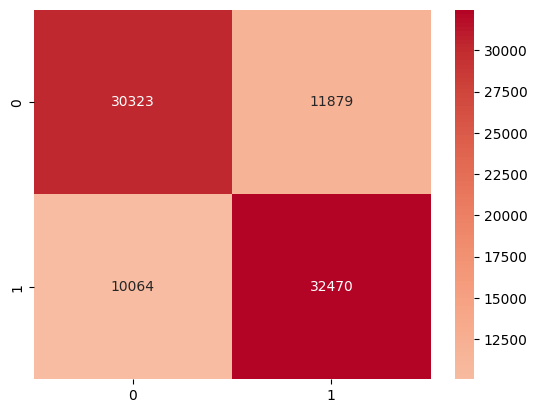

In [149]:
print("Результаты на Elevation")

X_test, y_test, X_train, y_train, X_val, y_val = split_data(['Elevation'])

# обучение на train
linreg_pipeline.fit(X_train, y_train)

# предсказания
y_train_pred = linreg_pipeline.predict(X_train)
y_val_pred   = linreg_pipeline.predict(X_val)
y_test_pred  = linreg_pipeline.predict(X_test)

# логируем результаты
log_results(linreg_name, "train", y_train, y_train_pred)
log_results(linreg_name, "val",   y_val,   y_val_pred)
log_results(linreg_name, "test",  y_test,  y_test_pred)

print("Модель:", linreg_name)
print_metrics("Train", y_train, y_train_pred)
print_metrics("Val",   y_val,   y_val_pred)
print_metrics("Test",  y_test,  y_test_pred)

print(classification_report(y_test, y_test_pred > 0.5))

sns.heatmap(confusion_matrix(y_test, y_test_pred > 0.5 ), annot=True, cmap='coolwarm', center=0, fmt='d')

Видим что качество незначительно упало, видимо, остальные признаки влияют сильно меньше

Результаты на 10 наиболее коррелирующих

Число признаков: 10
Список признаков: ['Soil_Type11', 'Soil_Type13', 'Soil_Type10', 'Wilderness_Area2', 'Soil_Type39', 'Soil_Type38', 'Soil_Type23', 'Soil_Type22', 'Soil_Type12', 'Elevation']

Train: (254208, 10) (254208,)
Val:   (84736, 10) (84736,)
Test:  (84736, 10) (84736,)
Модель: Linear Regression
=== Train ===
MSE : 0.18
RMSE: 0.42
MAE : 0.36
R2  : 0.2989
F1  : 0.7588

=== Val ===
MSE : 0.18
RMSE: 0.42
MAE : 0.36
R2  : 0.2988
F1  : 0.7582

=== Test ===
MSE : 0.17
RMSE: 0.42
MAE : 0.36
R2  : 0.3010
F1  : 0.7596

              precision    recall  f1-score   support

           0       0.76      0.74      0.75     42202
           1       0.75      0.77      0.76     42534

    accuracy                           0.76     84736
   macro avg       0.76      0.76      0.76     84736
weighted avg       0.76      0.76      0.76     84736



<Axes: >

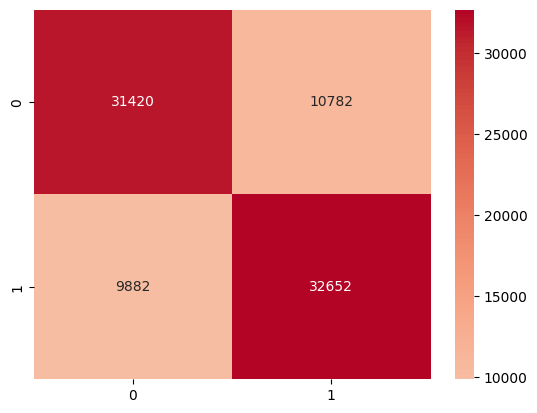

In [150]:
print("Результаты на 10 наиболее коррелирующих")

X_test, y_test, X_train, y_train, X_val, y_val = split_data(list(correlation)[-10:])

# обучение на train
linreg_pipeline.fit(X_train, y_train)

# предсказания
y_train_pred = linreg_pipeline.predict(X_train)
y_val_pred   = linreg_pipeline.predict(X_val)
y_test_pred  = linreg_pipeline.predict(X_test)

# логируем результаты
log_results(linreg_name, "train", y_train, y_train_pred)
log_results(linreg_name, "val",   y_val,   y_val_pred)
log_results(linreg_name, "test",  y_test,  y_test_pred)

print("Модель:", linreg_name)
print_metrics("Train", y_train, y_train_pred)
print_metrics("Val",   y_val,   y_val_pred)
print_metrics("Test",  y_test,  y_test_pred)

print(classification_report(y_test, y_test_pred  > 0.5))

sns.heatmap(confusion_matrix(y_test, y_test_pred  > 0.5), annot=True, cmap='coolwarm', center=0, fmt='d')

Результаты на Soil

Число признаков: 40
Список признаков: ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

Train: (254208, 40) (254208,)
Val:   (84736, 40) (84736,)
Test:  (84736, 40) (84736,)
Модель: Linear Regression
=== Train ===
MSE : 0.20
RMSE: 0.45
MAE : 0.40
R2  : 0.1983
F1  : 0.6094

=== Val ===
MSE : 0.20
RMSE: 0.45
MAE : 0.40
R2  : 0.1949
F1  : 0.6071

=== Test ===
MSE : 0.20
RMSE: 0.45
MAE : 0.40
R2  : 0.1979
F1  : 0.6090

              prec

<Axes: >

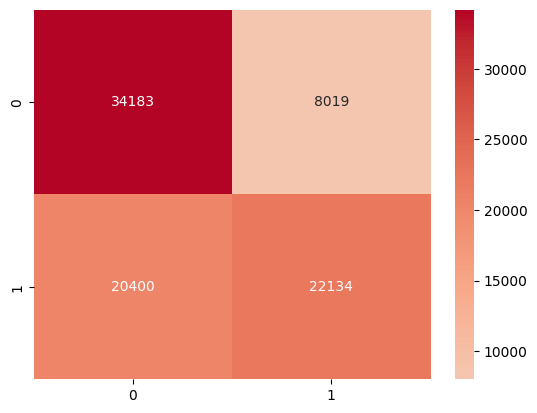

In [151]:
print("Результаты на Soil")

X_test, y_test, X_train, y_train, X_val, y_val = split_data(soil_features)

# обучение на train
linreg_pipeline.fit(X_train, y_train)

# предсказания
y_train_pred = linreg_pipeline.predict(X_train)
y_val_pred   = linreg_pipeline.predict(X_val)
y_test_pred  = linreg_pipeline.predict(X_test)

# логируем результаты
log_results(linreg_name, "train", y_train, y_train_pred)
log_results(linreg_name, "val",   y_val,   y_val_pred)
log_results(linreg_name, "test",  y_test,  y_test_pred)

print("Модель:", linreg_name)
print_metrics("Train", y_train, y_train_pred)
print_metrics("Val",   y_val,   y_val_pred)
print_metrics("Test",  y_test,  y_test_pred)

print(classification_report(y_test, y_test_pred > 0.5))

sns.heatmap(confusion_matrix(y_test, y_test_pred > 0.5), annot=True, cmap='coolwarm', center=0, fmt='d')

# Обучение случайный лес

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

set_seed(111)

rand_forest_name = "Random Forest"

rand_forest_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier())
])

Результаты на всех признаках

Число признаков: 54
Список признаков: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

Train: (254208, 54) (254208,)
Va

<Axes: >

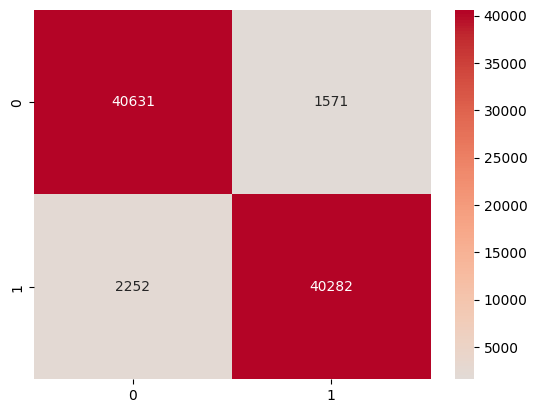

In [153]:
print("Результаты на всех признаках")

X_test, y_test, X_train, y_train, X_val, y_val = split_data(feature_cols)

# обучение на train
rand_forest_pipeline.fit(X_train, y_train)

# предсказания
y_train_pred = rand_forest_pipeline.predict(X_train)
y_val_pred   = rand_forest_pipeline.predict(X_val)
y_test_pred  = rand_forest_pipeline.predict(X_test)

# логируем результаты
log_results(rand_forest_name, "train", y_train, y_train_pred)
log_results(rand_forest_name, "val",   y_val,   y_val_pred)
log_results(rand_forest_name, "test",  y_test,  y_test_pred)

print("Модель:", rand_forest_name)
print_metrics("Train", y_train, y_train_pred)
print_metrics("Val",   y_val,   y_val_pred)
print_metrics("Test",  y_test,  y_test_pred)

print(classification_report(y_test, y_test_pred > 0.5))

sns.heatmap(confusion_matrix(y_test, y_test_pred > 0.5), annot=True, cmap='coolwarm', center=0, fmt='d')

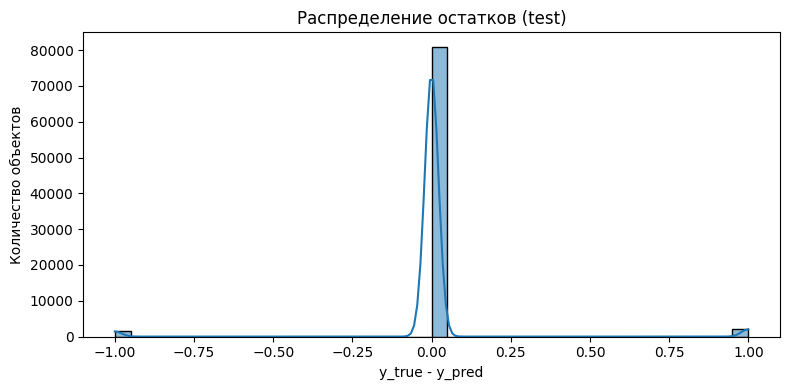

In [154]:
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Распределение остатков (test)")
plt.xlabel("y_true - y_pred")
plt.ylabel("Количество объектов")
plt.tight_layout()
plt.show()

[0 1 0 0 0]


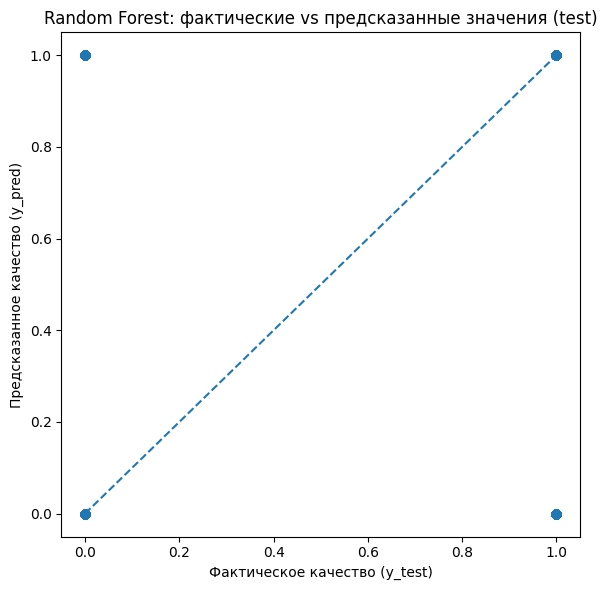

In [155]:
print(y_test_pred[:5])
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Фактическое качество (y_test)")
plt.ylabel("Предсказанное качество (y_pred)")
plt.title(f"Random Forest: фактические vs предсказанные значения (test)")
plt.tight_layout()
plt.show()

Результаты на Elevation

Число признаков: 1
Список признаков: ['Elevation']

Train: (254208, 1) (254208,)
Val:   (84736, 1) (84736,)
Test:  (84736, 1) (84736,)
Модель: Random Forest
=== Train ===
MSE : 0.26
RMSE: 0.51
MAE : 0.26
R2  : -0.0301
F1  : 0.7423

=== Val ===
MSE : 0.26
RMSE: 0.51
MAE : 0.26
R2  : -0.0343
F1  : 0.7433

=== Test ===
MSE : 0.26
RMSE: 0.51
MAE : 0.26
R2  : -0.0329
F1  : 0.7430

              precision    recall  f1-score   support

           0       0.74      0.74      0.74     42202
           1       0.74      0.74      0.74     42534

    accuracy                           0.74     84736
   macro avg       0.74      0.74      0.74     84736
weighted avg       0.74      0.74      0.74     84736



<Axes: >

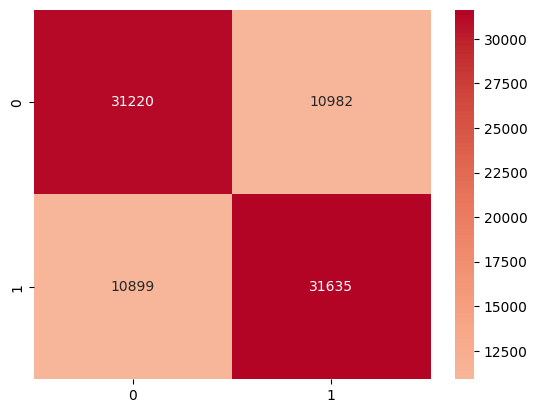

In [156]:
print("Результаты на Elevation")

X_test, y_test, X_train, y_train, X_val, y_val = split_data(['Elevation'])

# обучение на train
rand_forest_pipeline.fit(X_train, y_train)

# предсказания
y_train_pred = rand_forest_pipeline.predict(X_train)
y_val_pred   = rand_forest_pipeline.predict(X_val)
y_test_pred  = rand_forest_pipeline.predict(X_test)

# логируем результаты
log_results(rand_forest_name, "train", y_train, y_train_pred)
log_results(rand_forest_name, "val",   y_val,   y_val_pred)
log_results(rand_forest_name, "test",  y_test,  y_test_pred)

print("Модель:", rand_forest_name)
print_metrics("Train", y_train, y_train_pred)
print_metrics("Val",   y_val,   y_val_pred)
print_metrics("Test",  y_test,  y_test_pred)

print(classification_report(y_test, y_test_pred > 0.5))

sns.heatmap(confusion_matrix(y_test, y_test_pred > 0.5), annot=True, cmap='coolwarm', center=0, fmt='d')

Результаты на Soil

Число признаков: 40
Список признаков: ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

Train: (254208, 40) (254208,)
Val:   (84736, 40) (84736,)
Test:  (84736, 40) (84736,)
Модель: Random Forest
=== Train ===
MSE : 0.33
RMSE: 0.58
MAE : 0.33
R2  : -0.3372
F1  : 0.6094

=== Val ===
MSE : 0.34
RMSE: 0.58
MAE : 0.34
R2  : -0.3552
F1  : 0.6071

=== Test ===
MSE : 0.34
RMSE: 0.58
MAE : 0.34
R2  : -0.3416
F1  : 0.6090

              preci

<Axes: >

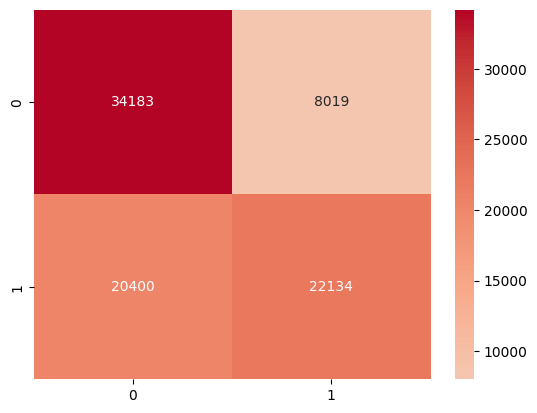

In [157]:
print("Результаты на Soil")

X_test, y_test, X_train, y_train, X_val, y_val = split_data(soil_features)

# обучение на train
rand_forest_pipeline.fit(X_train, y_train)

# предсказания
y_train_pred = rand_forest_pipeline.predict(X_train)
y_val_pred   = rand_forest_pipeline.predict(X_val)
y_test_pred  = rand_forest_pipeline.predict(X_test)

# логируем результаты
log_results(rand_forest_name, "train", y_train, y_train_pred)
log_results(rand_forest_name, "val",   y_val,   y_val_pred)
log_results(rand_forest_name, "test",  y_test,  y_test_pred)

print("Модель:", rand_forest_name)
print_metrics("Train", y_train, y_train_pred)
print_metrics("Val",   y_val,   y_val_pred)
print_metrics("Test",  y_test,  y_test_pred)

print(classification_report(y_test, y_test_pred > 0.5))

sns.heatmap(confusion_matrix(y_test, y_test_pred > 0.5), annot=True, cmap='coolwarm', center=0, fmt='d')

Результаты на основных признаках

Число признаков: 10
Список признаков: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

Train: (254208, 10) (254208,)
Val:   (84736, 10) (84736,)
Test:  (84736, 10) (84736,)
Модель: Random Forest
=== Train ===
MSE : 0.00
RMSE: 0.00
MAE : 0.00
R2  : 1.0000
F1  : 1.0000

=== Val ===
MSE : 0.05
RMSE: 0.22
MAE : 0.05
R2  : 0.7995
F1  : 0.9501

=== Test ===
MSE : 0.05
RMSE: 0.22
MAE : 0.05
R2  : 0.8015
F1  : 0.9504

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     42202
           1       0.95      0.95      0.95     42534

    accuracy                           0.95     84736
   macro avg       0.95      0.95      0.95     84736
weighted avg       0.95      0.95      0.95     84736



<Axes: >

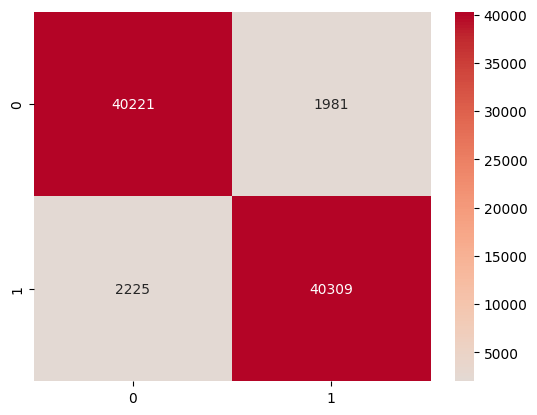

In [158]:
print("Результаты на основных признаках")

X_test, y_test, X_train, y_train, X_val, y_val = split_data(main_features)

# обучение на train
rand_forest_pipeline.fit(X_train, y_train)

# предсказания
y_train_pred = rand_forest_pipeline.predict(X_train)
y_val_pred   = rand_forest_pipeline.predict(X_val)
y_test_pred  = rand_forest_pipeline.predict(X_test)

# логируем результаты
log_results(rand_forest_name, "train", y_train, y_train_pred)
log_results(rand_forest_name, "val",   y_val,   y_val_pred)
log_results(rand_forest_name, "test",  y_test,  y_test_pred)

print("Модель:", rand_forest_name)
print_metrics("Train", y_train, y_train_pred)
print_metrics("Val",   y_val,   y_val_pred)
print_metrics("Test",  y_test,  y_test_pred)

print(classification_report(y_test, y_test_pred > 0.5))

sns.heatmap(confusion_matrix(y_test, y_test_pred > 0.5), annot=True, cmap='coolwarm', center=0, fmt='d')

In [159]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

set_seed(111)

rand_forest_10_name = "Random Forest 10"

rand_forest_10_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(max_depth=10))
])

Результаты на всех признаках

Число признаков: 54
Список признаков: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

Train: (254208, 54) (254208,)
Va

<Axes: >

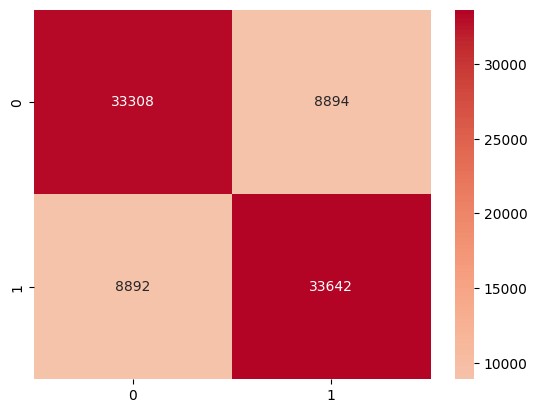

In [160]:
print("Результаты на всех признаках")

X_test, y_test, X_train, y_train, X_val, y_val = split_data(feature_cols)

# обучение на train
rand_forest_10_pipeline.fit(X_train, y_train)

# предсказания
y_train_pred = rand_forest_10_pipeline.predict(X_train)
y_val_pred   = rand_forest_10_pipeline.predict(X_val)
y_test_pred  = rand_forest_10_pipeline.predict(X_test)

# логируем результаты
log_results(rand_forest_10_name, "train", y_train, y_train_pred)
log_results(rand_forest_10_name, "val",   y_val,   y_val_pred)
log_results(rand_forest_10_name, "test",  y_test,  y_test_pred)

print("Модель:", rand_forest_10_name)
print_metrics("Train", y_train, y_train_pred)
print_metrics("Val",   y_val,   y_val_pred)
print_metrics("Test",  y_test,  y_test_pred)

print(classification_report(y_test, y_test_pred > 0.5))

sns.heatmap(confusion_matrix(y_test, y_test_pred > 0.5), annot=True, cmap='coolwarm', center=0, fmt='d')

# Отчет

В рамках данной работы было обучено две модели - случайный лес и линейная регрессия для решения задачи классификации

Более хорошие результаты показал случайный лес, обученный на всех признаках, это дало очень высокую точность. 

Самыми влияющими признаками оказались "основные признаки", при отказе от area и soil точность незначительно изменилась.Самый влияющий признак - Elevation.  Модель достаточно равномерно дает FN и FP результаты